# Pyber Ride Sharing
## Analysis
* Observed trend 1
* Observed trend 2
* Observed trend 3

In [4]:
from os import path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
file_name1 = 'city_data.csv'
file_name2 = 'ride_data.csv'

csv_path1 = path.join('..','raw_data',file_name1)
csv_path2 = path.join('..','raw_data',file_name2)

In [34]:
city_df = pd.read_csv(csv_path1)
ride_df = pd.read_csv(csv_path2)

In [69]:
city_ride_df = pd.merge(ride_df, city_df, how='outer', on='city', sort=True)
city_ride_df.head()

,city,date,fare,ride_id,driver_count,type
0,Alvarezhaven,2016-04-18 20:51:29,31.93,4267015736324,21,Urban
1,Alvarezhaven,2016-08-01 00:39:48,6.42,8394540350728,21,Urban
2,Alvarezhaven,2016-09-01 22:57:12,18.09,1197329964911,21,Urban
3,Alvarezhaven,2016-08-18 07:12:06,20.74,357421158941,21,Urban
4,Alvarezhaven,2016-04-04 23:45:50,14.25,6431434271355,21,Urban


## Bubble Plot of Ride Sharing Data

In [87]:
print(len(city_ride_df['driver_count'].value_counts()))
len(city_ride_df['city'].value_counts())

54


125

In [ ]:
# make 3 different plots segmented into the 3 city types
# each city type should have three seperate lists
# x_axis = total number of rides (per city)
# y_axis = average fare ($)
# z_axis = driver count (per city)

urban_df =    city_ride_df.loc[city_ride_df['type'] == 'Urban']
suburban_df = city_ride_df.loc[city_ride_df['type'] == 'Suburban']
rural_df =    city_ride_df.loc[city_ride_df['type'] == 'Rural']

In [115]:
# urban
urban_city_sm = urban_df.groupby('city').sum()
urban_city_ct = urban_df.groupby('city').count()
urban_city_mn = urban_df.groupby('city').mean()

# x_axis
urban_city_rides_axis = list(urban_city_ct['driver_count'])

# y_axis
urban_city_fare_axis = list(urban_city_mn['fare'])

# z_axis
urban_city_driver_axis = list((urban_city_sm / urban_city_ct)['driver_count'])

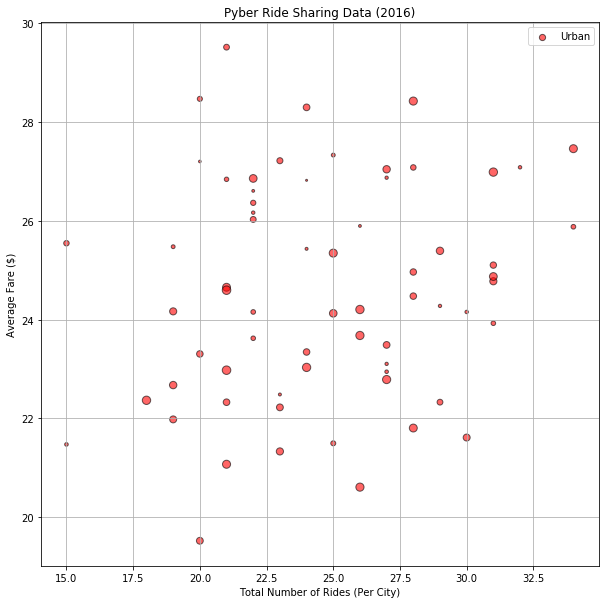

In [136]:
# plot the graph
fig = plt.figure(figsize=(10,10))

urban_ax =    fig.add_subplot(111)
#suburban_ax = fig.add_subplot(112)
#rural_ax =    fig.add_subplot(113)

urban_ax.scatter(urban_city_rides_axis, urban_city_fare_axis,s=urban_city_driver_axis, 
                 edgecolors='black', facecolor='red', alpha=.6,  label='Urban'
                )


plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.legend()
plt.grid()
plt.show()